<a href="https://colab.research.google.com/github/mominaamer/Machine-Learning-Projects/blob/main/glass_classification_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <span id="1"></span> ** 1. Overview **

Columns:
- <b> RI: </b> refractive index 
- <b> NA: </b> Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- <b> Mg: </b> Magnesium
- <b> Al: </b> Aluminum
- <b> K: </b> Potassium
- <b> Ca: </b> Calcium
- <b> Ba: </b> Barium
- <b> Fe: </b> Iron
- <b> Type of glass: </b> 1 building_windows_float_processed -- 2 building_windows_non_float_processed -- 3 vehicle_windows_float_processed -- 4 vehicle_windows_non_float_processed (none in this database) -- 5 containers -- 6 tableware -- 7 headlamps

## <span id="2"></span> ** 2. Importing Libraries and Reading the Dataset **

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [ ]:
dataset = pd.read_csv('/kaggle/input/glass/glass.csv')
dataset.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## <span id="3"></span> ** 3. Data Visualization and Preprocessing **

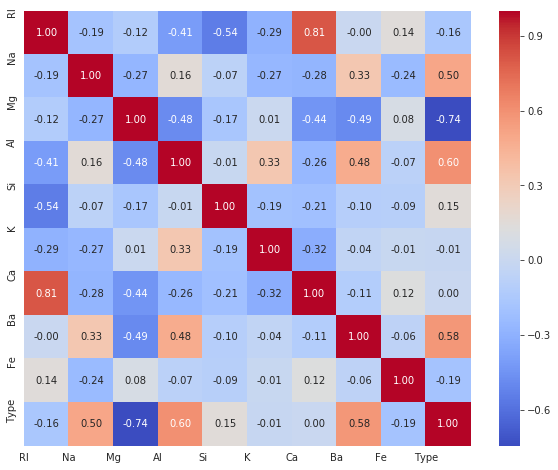

In [ ]:
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

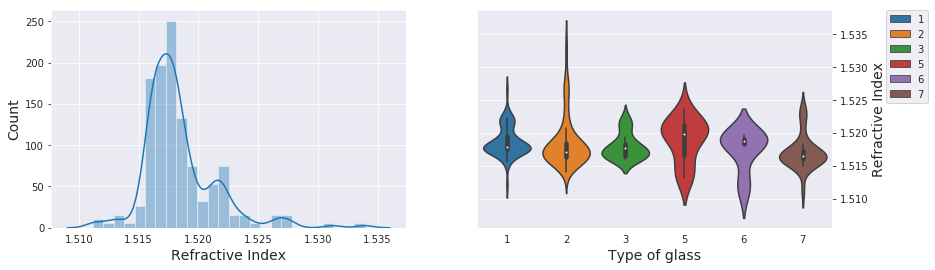

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['RI'], ax = axes[0])
axes[0].set_xlabel('Refractive Index', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'RI', data = dataset, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Refractive Index', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

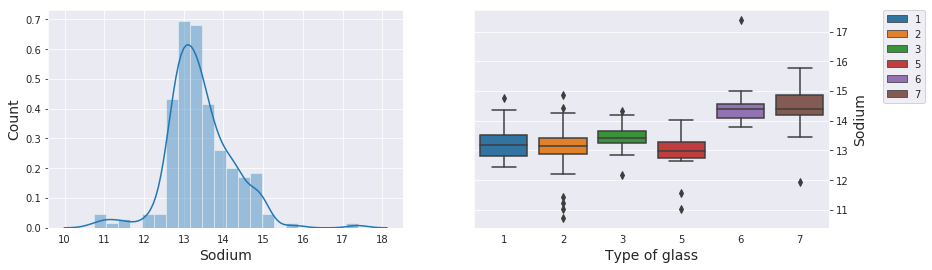

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['Na'], ax = axes[0])
axes[0].set_xlabel('Sodium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = 'Type', y = 'Na', data = dataset, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Sodium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

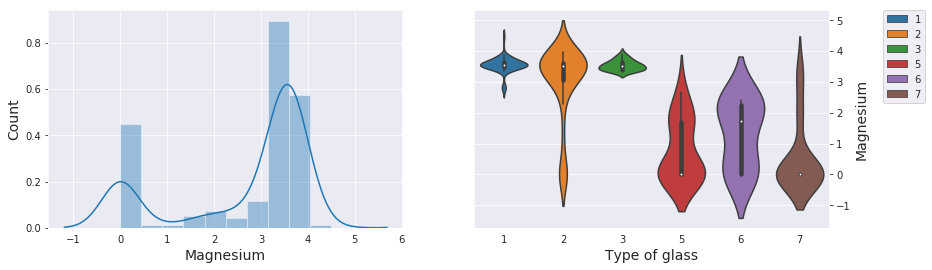

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['Mg'], ax = axes[0])
axes[0].set_xlabel('Magnesium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Mg', data = dataset, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Magnesium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

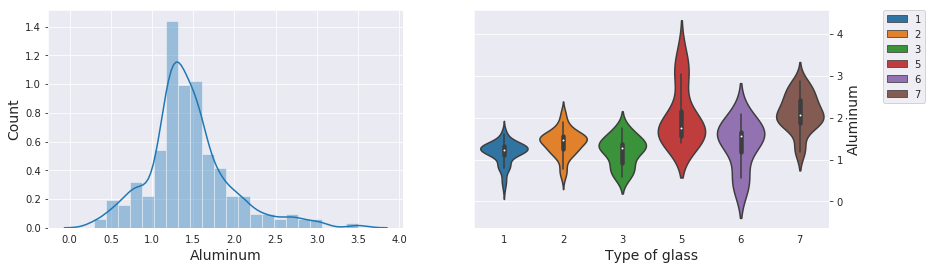

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['Al'], ax = axes[0])
axes[0].set_xlabel('Aluminum', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Al', data = dataset, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Aluminum', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

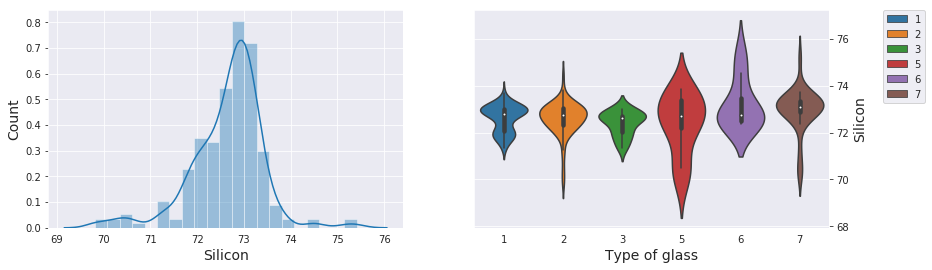

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['Si'], ax = axes[0])
axes[0].set_xlabel('Silicon', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Si', data = dataset, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Silicon', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

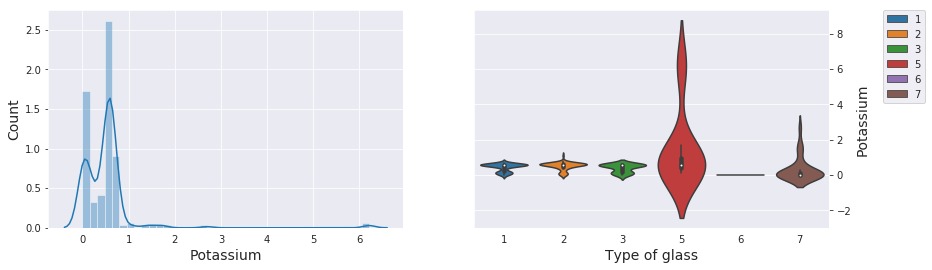

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['K'], ax = axes[0])
axes[0].set_xlabel('Potassium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'K', data = dataset, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Potassium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

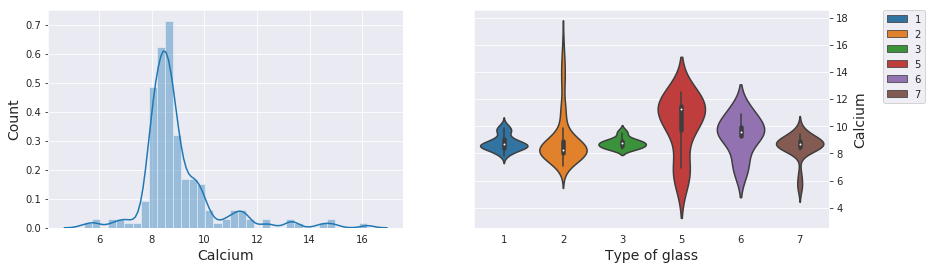

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['Ca'], ax = axes[0])
axes[0].set_xlabel('Calcium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Ca', data = dataset, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Calcium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

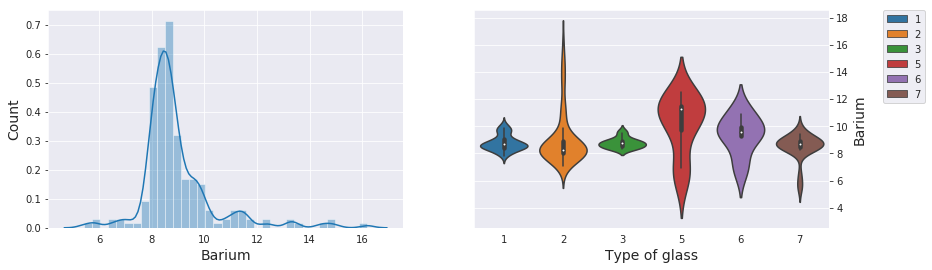

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['Ca'], ax = axes[0])
axes[0].set_xlabel('Barium', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Ca', data = dataset, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Barium', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

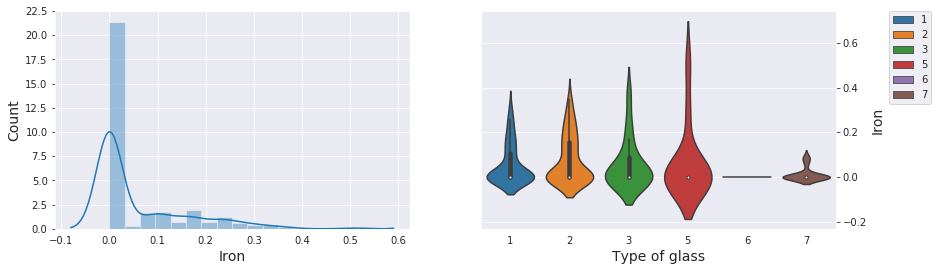

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['Fe'], ax = axes[0])
axes[0].set_xlabel('Iron', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Type', y = 'Fe', data = dataset, hue = 'Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Type of glass', fontsize=14)
axes[1].set_ylabel('Iron', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

In [ ]:
X = dataset.drop('Type', axis = 1).values
y = dataset['Type'].values.reshape(-1,1)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (160, 9)
Shape of X_test:  (54, 9)
Shape of y_train:  (160, 1)
Shape of y_test (54, 1)


## <span id="4"></span> ** 4. Classification Models **

### <span id="5"></span> ** Logistic Regression **

In [ ]:
# Fitting Logistic Regression to the Training set
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression()
steps = [
    ('scalar', StandardScaler()),
    ('model', LogisticRegression())
]

lr_pipe = Pipeline(steps)

In [ ]:
parameters = { 'model__C' : [1,10,100,1000,10000],
               'model__fit_intercept' : [True],
               'model__multi_class' : ['auto'],
               'model__tol' : [0.0001],
               'model__solver' : ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'model__n_jobs' : [-1],
               'model__max_iter' : [5000],
               'model__random_state': [42] 
}
classifier_lr = GridSearchCV(lr_pipe, parameters, iid=False, cv = 3)
classifier_lr = classifier_lr.fit(X_train, y_train.ravel())

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_lr_train = classifier_lr.predict(X_train)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Training set: ", accuracy_lr_train)

y_pred_lr_test = classifier_lr.predict(X_test)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Test set: ", accuracy_lr_test)

Training set:  0.68125
Test set:  0.6666666666666666


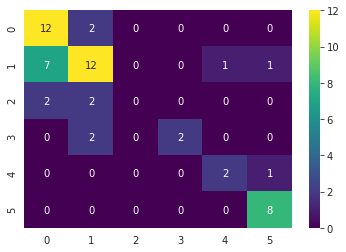

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### <span id="6"></span> ** K-Nearest Neighbors (K-NN) **

In [ ]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
steps = [
    ('scalar', StandardScaler()),
    ('model', KNeighborsClassifier())
]
knn_pipe = Pipeline(steps)

In [ ]:
parameters = { 'model__algorithm' : ['brute'],
               'model__leaf_size' : [30,50,70,90,110],
               'model__metric' : ['minkowski'],
               'model__p' : [1],
               'model__n_neighbors' : [3,5,11,19],
               'model__weights' : ['uniform', 'distance'],
               'model__n_jobs' : [-1]
}
classifier_knn = GridSearchCV(knn_pipe, parameters, iid=False, cv = 3)
classifier_knn = classifier_knn.fit(X_train, y_train.ravel())

In [ ]:
y_pred_knn_train = classifier_knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)

Training set:  1.0
Test set:  0.7407407407407407


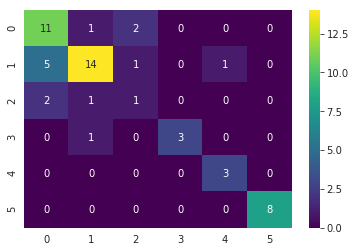

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### <span id="7"></span> ** Support Vector Machine (SVM - Linear) **

In [ ]:
from sklearn.svm import SVC
classifier_svm = SVC()
steps = [
    ('scalar', StandardScaler()),
    ('model', SVC())
]
svm_linear_pipe = Pipeline(steps)

In [ ]:
parameters = { 'model__kernel' : ['linear'],
               'model__C' : [1,10,100,1000,10000],
               'model__random_state' : [42]
}
classifier_svm_linear = GridSearchCV(svm_linear_pipe, parameters, iid=False, cv = 3)
classifier_svm_linear = classifier_svm_linear.fit(X_train, y_train.ravel())

In [ ]:
y_pred_svm_linear_train = classifier_svm_linear.predict(X_train)
accuracy_svm_linear_train = accuracy_score(y_train, y_pred_svm_linear_train)
print("Training set: ", accuracy_svm_linear_train)

y_pred_svm_linear_test = classifier_svm_linear.predict(X_test)
accuracy_svm_linear_test = accuracy_score(y_test, y_pred_svm_linear_test)
print("Test set: ", accuracy_svm_linear_test)

Training set:  0.75
Test set:  0.7037037037037037


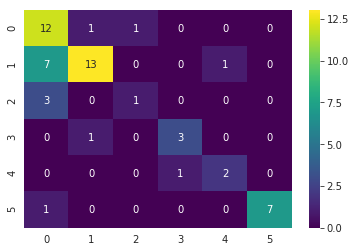

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm_linear_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### <span id="8"></span> ** Support Vector Machine (SVM - Kernel) **

In [ ]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier_svm_kernel = SVC()
steps = [
    ('scalar', StandardScaler()),
    ('model', SVC())
]
svm_kernel_pipe = Pipeline(steps)

In [ ]:
parameters = { 'model__kernel' : ['rbf', 'poly', 'sigmoid'],
               'model__C' : [1,10,100,1000,10000],
               'model__gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
               'model__random_state' : [42],
               'model__degree' : [1,2,3]
}
classifier_svm_kernel = GridSearchCV(svm_kernel_pipe, parameters, iid=False, cv = 3)
classifier_svm_kernel = classifier_svm_kernel.fit(X_train, y_train.ravel())

In [ ]:
y_pred_svm_kernel_train = classifier_svm_kernel.predict(X_train)
accuracy_svm_kernel_train = accuracy_score(y_train, y_pred_svm_kernel_train)
print("Training set: ", accuracy_svm_kernel_train)

y_pred_svm_kernel_test = classifier_svm_kernel.predict(X_test)
accuracy_svm_kernel_test = accuracy_score(y_test, y_pred_svm_kernel_test)
print("Test set: ", accuracy_svm_kernel_test)

Training set:  0.81875
Test set:  0.7777777777777778


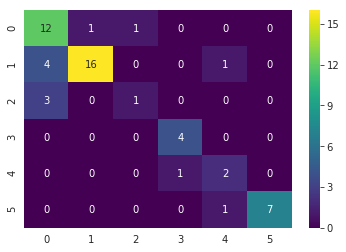

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm_kernel_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### <span id="9"></span> ** Naive Bayes **

In [ ]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_nb_train = classifier_nb.predict(X_train)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(X_test)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Test set: ", accuracy_nb_test)

Training set:  0.3125
Test set:  0.35185185185185186


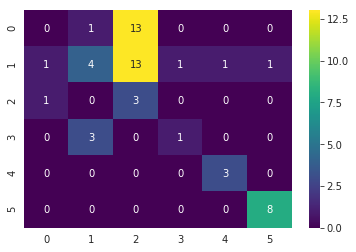

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### <span id="10"></span> ** Decision Tree Classification **

In [ ]:
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier()

steps = [
    ('scalar', StandardScaler()),
    ('model', DecisionTreeClassifier())
]
dt_pipe = Pipeline(steps)

In [ ]:
# Applying Grid Search to find the best model and the best parameters
parameters = [ { "model__max_depth": np.arange(1,21),
                 "model__min_samples_leaf": [1, 5, 10, 20, 50, 100],
                 "model__min_samples_split": np.arange(2, 11),
                 "model__criterion": ["gini"],
                 "model__random_state" : [42]}
            ]
classifier_dt = GridSearchCV(estimator = dt_pipe,
                           param_grid  = parameters,
                           cv = 3,
                           iid = False,
                           n_jobs = -1)
classifier_dt = classifier_dt.fit(X_train, y_train.ravel())

In [ ]:
y_pred_dt_train = classifier_dt.predict(X_train)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set: ", accuracy_dt_train)

y_pred_dt_test = classifier_dt.predict(X_test)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set: ", accuracy_dt_test)

Training set:  0.9
Test set:  0.6851851851851852


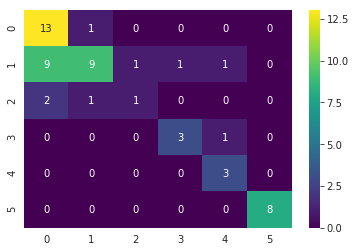

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### <span id="11"></span> ** Random Forest Classification **

In [ ]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
classifier_rf = RandomForestClassifier()

steps = [
    ('scalar', StandardScaler()),
    ('model', RandomForestClassifier())
]
rf_pipe = Pipeline(steps)

In [ ]:
parameters =  { "model__n_estimators": [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
                "model__max_features": ["auto", "sqrt"],
                "model__max_depth": np.linspace(10, 110, num = 11),
                "model__min_samples_split": [2, 5, 10],
                "model__min_samples_leaf": [1, 2, 4],
                "model__bootstrap": [True, False],
                "model__criterion": ["gini"],
                "model__random_state" : [42] }
            
classifier_rf = RandomizedSearchCV(estimator = rf_pipe,
                                  param_distributions = parameters,
                                  n_iter = 100,
                                  cv = 3,
                                  random_state=42,
                                  verbose = 4,
                                  n_jobs = -1)
classifier_rf = classifier_rf.fit(X_train, y_train.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.5min finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [ ]:
y_pred_rf_train = classifier_rf.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)

y_pred_rf_test = classifier_rf.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

Training set:  1.0
Test set:  0.7962962962962963


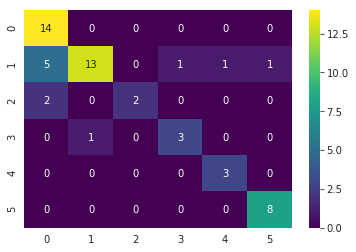

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### <span id="12"></span> ** Artificial Neural Network (ANN) **

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
# Feature Scaling
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.fit_transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(160, 9)
(54, 9)


In [ ]:
# Defining a function to encode output column
from keras.utils import to_categorical
def encode(data):
    print('Shape of data (BEFORE encode): %s' % str(data.shape))
    encoded = to_categorical(data)
    print('Shape of data (AFTER  encode): %s\n' % str(encoded.shape))
    return encoded

In [ ]:
y_train_encoded = encode(y_train)

Shape of data (BEFORE encode): (160, 1)
Shape of data (AFTER  encode): (160, 8)



In [ ]:
y_test_encoded = encode(y_test)

Shape of data (BEFORE encode): (54, 1)
Shape of data (AFTER  encode): (54, 8)



In [ ]:
y_train_encoded = np.delete(y_train_encoded, [0,4], axis = 1)
y_test_encoded = np.delete(y_test_encoded, [0,4], axis = 1)
print(y_train_encoded[2])
print(y_test_encoded[2])

[0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0.]


In [ ]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier.fit(X_train_scaled, y_train_encoded, validation_data=(X_test_scaled, y_test_encoded), batch_size = 100, epochs = 1150)

Train on 160 samples, validate on 54 samples
Epoch 1/1150
160/160 [==============================] - 1s 4ms/step - loss: 1.7914 - acc: 0.3187 - val_loss: 1.7905 - val_acc: 0.3333
Epoch 2/1150
160/160 [==============================] - 0s 47us/step - loss: 1.7900 - acc: 0.3812 - val_loss: 1.7892 - val_acc: 0.3333
Epoch 3/1150
160/160 [==============================] - 0s 44us/step - loss: 1.7885 - acc: 0.3875 - val_loss: 1.7879 - val_acc: 0.3333
Epoch 4/1150
160/160 [==============================] - 0s 52us/step - loss: 1.7871 - acc: 0.4000 - val_loss: 1.7866 - val_acc: 0.3333
Epoch 5/1150
160/160 [==============================] - 0s 47us/step - loss: 1.7855 - acc: 0.4125 - val_loss: 1.7852 - val_acc: 0.3333
Epoch 6/1150
160/160 [==============================] - 0s 55us/step - loss: 1.7840 - acc: 0.4125 - val_loss: 1.7838 - val_acc: 0.3519
Epoch 7/1150
160/160 [==============================] - 0s 49us/step - loss: 1.7824 - acc: 0.4125 - val_loss: 1.7823 - val_acc: 0.3519
Epoch 8/115

Epoch 61/1150
160/160 [==============================] - 0s 39us/step - loss: 1.4874 - acc: 0.4125 - val_loss: 1.5027 - val_acc: 0.3889
Epoch 62/1150
160/160 [==============================] - 0s 48us/step - loss: 1.4763 - acc: 0.4312 - val_loss: 1.4922 - val_acc: 0.3889
Epoch 63/1150
160/160 [==============================] - 0s 56us/step - loss: 1.4650 - acc: 0.4625 - val_loss: 1.4817 - val_acc: 0.4259
Epoch 64/1150
160/160 [==============================] - 0s 54us/step - loss: 1.4538 - acc: 0.4875 - val_loss: 1.4712 - val_acc: 0.4259
Epoch 65/1150
160/160 [==============================] - 0s 41us/step - loss: 1.4419 - acc: 0.5062 - val_loss: 1.4608 - val_acc: 0.4815
Epoch 66/1150
160/160 [==============================] - 0s 37us/step - loss: 1.4310 - acc: 0.5125 - val_loss: 1.4505 - val_acc: 0.5000
Epoch 67/1150
160/160 [==============================] - 0s 34us/step - loss: 1.4194 - acc: 0.5125 - val_loss: 1.4402 - val_acc: 0.5000
Epoch 68/1150
160/160 [=========================

160/160 [==============================] - 0s 51us/step - loss: 1.0766 - acc: 0.5563 - val_loss: 1.1421 - val_acc: 0.5000
Epoch 122/1150
160/160 [==============================] - 0s 53us/step - loss: 1.0742 - acc: 0.5625 - val_loss: 1.1401 - val_acc: 0.5000
Epoch 123/1150
160/160 [==============================] - 0s 49us/step - loss: 1.0719 - acc: 0.5625 - val_loss: 1.1380 - val_acc: 0.5000
Epoch 124/1150
160/160 [==============================] - 0s 44us/step - loss: 1.0696 - acc: 0.5625 - val_loss: 1.1361 - val_acc: 0.5000
Epoch 125/1150
160/160 [==============================] - 0s 49us/step - loss: 1.0675 - acc: 0.5687 - val_loss: 1.1341 - val_acc: 0.5000
Epoch 126/1150
160/160 [==============================] - 0s 48us/step - loss: 1.0652 - acc: 0.5687 - val_loss: 1.1323 - val_acc: 0.5000
Epoch 127/1150
160/160 [==============================] - 0s 49us/step - loss: 1.0631 - acc: 0.5750 - val_loss: 1.1303 - val_acc: 0.5000
Epoch 128/1150
160/160 [==============================] 

Epoch 181/1150
160/160 [==============================] - 0s 42us/step - loss: 0.9846 - acc: 0.6375 - val_loss: 1.0561 - val_acc: 0.5370
Epoch 182/1150
160/160 [==============================] - 0s 40us/step - loss: 0.9835 - acc: 0.6313 - val_loss: 1.0553 - val_acc: 0.5370
Epoch 183/1150
160/160 [==============================] - 0s 41us/step - loss: 0.9825 - acc: 0.6313 - val_loss: 1.0543 - val_acc: 0.5370
Epoch 184/1150
160/160 [==============================] - 0s 46us/step - loss: 0.9813 - acc: 0.6312 - val_loss: 1.0530 - val_acc: 0.5370
Epoch 185/1150
160/160 [==============================] - 0s 47us/step - loss: 0.9801 - acc: 0.6375 - val_loss: 1.0517 - val_acc: 0.5370
Epoch 186/1150
160/160 [==============================] - 0s 39us/step - loss: 0.9790 - acc: 0.6375 - val_loss: 1.0503 - val_acc: 0.5370
Epoch 187/1150
160/160 [==============================] - 0s 38us/step - loss: 0.9782 - acc: 0.6437 - val_loss: 1.0490 - val_acc: 0.5370
Epoch 188/1150
160/160 [=================

Epoch 241/1150
160/160 [==============================] - 0s 39us/step - loss: 0.9262 - acc: 0.6500 - val_loss: 0.9909 - val_acc: 0.6111
Epoch 242/1150
160/160 [==============================] - 0s 46us/step - loss: 0.9254 - acc: 0.6500 - val_loss: 0.9901 - val_acc: 0.6111
Epoch 243/1150
160/160 [==============================] - 0s 49us/step - loss: 0.9246 - acc: 0.6500 - val_loss: 0.9893 - val_acc: 0.6111
Epoch 244/1150
160/160 [==============================] - 0s 49us/step - loss: 0.9238 - acc: 0.6500 - val_loss: 0.9886 - val_acc: 0.6111
Epoch 245/1150
160/160 [==============================] - 0s 56us/step - loss: 0.9230 - acc: 0.6500 - val_loss: 0.9884 - val_acc: 0.6111
Epoch 246/1150
160/160 [==============================] - 0s 55us/step - loss: 0.9221 - acc: 0.6500 - val_loss: 0.9878 - val_acc: 0.6111
Epoch 247/1150
160/160 [==============================] - 0s 57us/step - loss: 0.9214 - acc: 0.6500 - val_loss: 0.9868 - val_acc: 0.6111
Epoch 248/1150
160/160 [=================

Epoch 301/1150
160/160 [==============================] - 0s 42us/step - loss: 0.8828 - acc: 0.6625 - val_loss: 0.9374 - val_acc: 0.6296
Epoch 302/1150
160/160 [==============================] - 0s 42us/step - loss: 0.8822 - acc: 0.6625 - val_loss: 0.9375 - val_acc: 0.6296
Epoch 303/1150
160/160 [==============================] - 0s 50us/step - loss: 0.8819 - acc: 0.6625 - val_loss: 0.9377 - val_acc: 0.6296
Epoch 304/1150
160/160 [==============================] - 0s 41us/step - loss: 0.8811 - acc: 0.6625 - val_loss: 0.9369 - val_acc: 0.6296
Epoch 305/1150
160/160 [==============================] - 0s 39us/step - loss: 0.8805 - acc: 0.6625 - val_loss: 0.9364 - val_acc: 0.6296
Epoch 306/1150
160/160 [==============================] - 0s 48us/step - loss: 0.8799 - acc: 0.6688 - val_loss: 0.9362 - val_acc: 0.6296
Epoch 307/1150
160/160 [==============================] - 0s 39us/step - loss: 0.8793 - acc: 0.6688 - val_loss: 0.9357 - val_acc: 0.6296
Epoch 308/1150
160/160 [=================

Epoch 361/1150
160/160 [==============================] - 0s 36us/step - loss: 0.8533 - acc: 0.6688 - val_loss: 0.9029 - val_acc: 0.6296
Epoch 362/1150
160/160 [==============================] - 0s 43us/step - loss: 0.8528 - acc: 0.6688 - val_loss: 0.9020 - val_acc: 0.6296
Epoch 363/1150
160/160 [==============================] - 0s 42us/step - loss: 0.8524 - acc: 0.6688 - val_loss: 0.9019 - val_acc: 0.6296
Epoch 364/1150
160/160 [==============================] - 0s 36us/step - loss: 0.8519 - acc: 0.6687 - val_loss: 0.9011 - val_acc: 0.6296
Epoch 365/1150
160/160 [==============================] - 0s 46us/step - loss: 0.8516 - acc: 0.6687 - val_loss: 0.9001 - val_acc: 0.6296
Epoch 366/1150
160/160 [==============================] - 0s 44us/step - loss: 0.8513 - acc: 0.6688 - val_loss: 0.8995 - val_acc: 0.6296
Epoch 367/1150
160/160 [==============================] - 0s 39us/step - loss: 0.8508 - acc: 0.6688 - val_loss: 0.8989 - val_acc: 0.6296
Epoch 368/1150
160/160 [=================

Epoch 421/1150
160/160 [==============================] - 0s 33us/step - loss: 0.8321 - acc: 0.6687 - val_loss: 0.8838 - val_acc: 0.6296
Epoch 422/1150
160/160 [==============================] - 0s 57us/step - loss: 0.8318 - acc: 0.6687 - val_loss: 0.8842 - val_acc: 0.6296
Epoch 423/1150
160/160 [==============================] - 0s 46us/step - loss: 0.8316 - acc: 0.6688 - val_loss: 0.8847 - val_acc: 0.6296
Epoch 424/1150
160/160 [==============================] - 0s 49us/step - loss: 0.8312 - acc: 0.6750 - val_loss: 0.8846 - val_acc: 0.6296
Epoch 425/1150
160/160 [==============================] - 0s 41us/step - loss: 0.8309 - acc: 0.6750 - val_loss: 0.8846 - val_acc: 0.6296
Epoch 426/1150
160/160 [==============================] - 0s 48us/step - loss: 0.8307 - acc: 0.6750 - val_loss: 0.8838 - val_acc: 0.6296
Epoch 427/1150
160/160 [==============================] - 0s 38us/step - loss: 0.8303 - acc: 0.6750 - val_loss: 0.8836 - val_acc: 0.6296
Epoch 428/1150
160/160 [=================

Epoch 481/1150
160/160 [==============================] - 0s 56us/step - loss: 0.8159 - acc: 0.6750 - val_loss: 0.8765 - val_acc: 0.6481
Epoch 482/1150
160/160 [==============================] - 0s 50us/step - loss: 0.8158 - acc: 0.6750 - val_loss: 0.8766 - val_acc: 0.6481
Epoch 483/1150
160/160 [==============================] - 0s 45us/step - loss: 0.8155 - acc: 0.6813 - val_loss: 0.8773 - val_acc: 0.6481
Epoch 484/1150
160/160 [==============================] - 0s 47us/step - loss: 0.8152 - acc: 0.6875 - val_loss: 0.8782 - val_acc: 0.6481
Epoch 485/1150
160/160 [==============================] - 0s 49us/step - loss: 0.8150 - acc: 0.6875 - val_loss: 0.8784 - val_acc: 0.6481
Epoch 486/1150
160/160 [==============================] - 0s 36us/step - loss: 0.8148 - acc: 0.6875 - val_loss: 0.8781 - val_acc: 0.6481
Epoch 487/1150
160/160 [==============================] - 0s 38us/step - loss: 0.8145 - acc: 0.6875 - val_loss: 0.8775 - val_acc: 0.6481
Epoch 488/1150
160/160 [=================

Epoch 541/1150
160/160 [==============================] - 0s 40us/step - loss: 0.8028 - acc: 0.6875 - val_loss: 0.8742 - val_acc: 0.6481
Epoch 542/1150
160/160 [==============================] - 0s 41us/step - loss: 0.8026 - acc: 0.6875 - val_loss: 0.8740 - val_acc: 0.6481
Epoch 543/1150
160/160 [==============================] - 0s 53us/step - loss: 0.8022 - acc: 0.6875 - val_loss: 0.8748 - val_acc: 0.6481
Epoch 544/1150
160/160 [==============================] - 0s 44us/step - loss: 0.8020 - acc: 0.6875 - val_loss: 0.8749 - val_acc: 0.6481
Epoch 545/1150
160/160 [==============================] - 0s 48us/step - loss: 0.8017 - acc: 0.6875 - val_loss: 0.8753 - val_acc: 0.6481
Epoch 546/1150
160/160 [==============================] - 0s 52us/step - loss: 0.8015 - acc: 0.6937 - val_loss: 0.8760 - val_acc: 0.6481
Epoch 547/1150
160/160 [==============================] - 0s 53us/step - loss: 0.8012 - acc: 0.6938 - val_loss: 0.8769 - val_acc: 0.6481
Epoch 548/1150
160/160 [=================

Epoch 601/1150
160/160 [==============================] - 0s 38us/step - loss: 0.7890 - acc: 0.6875 - val_loss: 0.8754 - val_acc: 0.6667
Epoch 602/1150
160/160 [==============================] - 0s 39us/step - loss: 0.7887 - acc: 0.6875 - val_loss: 0.8744 - val_acc: 0.6667
Epoch 603/1150
160/160 [==============================] - 0s 44us/step - loss: 0.7890 - acc: 0.6938 - val_loss: 0.8732 - val_acc: 0.6667
Epoch 604/1150
160/160 [==============================] - 0s 51us/step - loss: 0.7884 - acc: 0.6937 - val_loss: 0.8735 - val_acc: 0.6667
Epoch 605/1150
160/160 [==============================] - 0s 52us/step - loss: 0.7882 - acc: 0.6937 - val_loss: 0.8743 - val_acc: 0.6667
Epoch 606/1150
160/160 [==============================] - 0s 47us/step - loss: 0.7881 - acc: 0.6938 - val_loss: 0.8748 - val_acc: 0.6667
Epoch 607/1150
160/160 [==============================] - 0s 50us/step - loss: 0.7877 - acc: 0.6938 - val_loss: 0.8761 - val_acc: 0.6667
Epoch 608/1150
160/160 [=================

Epoch 661/1150
160/160 [==============================] - 0s 34us/step - loss: 0.7767 - acc: 0.7000 - val_loss: 0.8776 - val_acc: 0.6667
Epoch 662/1150
160/160 [==============================] - 0s 40us/step - loss: 0.7767 - acc: 0.7000 - val_loss: 0.8782 - val_acc: 0.6667
Epoch 663/1150
160/160 [==============================] - 0s 35us/step - loss: 0.7764 - acc: 0.7000 - val_loss: 0.8774 - val_acc: 0.6667
Epoch 664/1150
160/160 [==============================] - 0s 37us/step - loss: 0.7763 - acc: 0.7000 - val_loss: 0.8768 - val_acc: 0.6667
Epoch 665/1150
160/160 [==============================] - 0s 42us/step - loss: 0.7759 - acc: 0.7000 - val_loss: 0.8769 - val_acc: 0.6667
Epoch 666/1150
160/160 [==============================] - 0s 34us/step - loss: 0.7756 - acc: 0.7000 - val_loss: 0.8771 - val_acc: 0.6667
Epoch 667/1150
160/160 [==============================] - 0s 45us/step - loss: 0.7755 - acc: 0.7000 - val_loss: 0.8770 - val_acc: 0.6667
Epoch 668/1150
160/160 [=================

Epoch 721/1150
160/160 [==============================] - 0s 50us/step - loss: 0.7631 - acc: 0.6937 - val_loss: 0.8673 - val_acc: 0.7037
Epoch 722/1150
160/160 [==============================] - 0s 39us/step - loss: 0.7627 - acc: 0.6937 - val_loss: 0.8669 - val_acc: 0.7037
Epoch 723/1150
160/160 [==============================] - 0s 38us/step - loss: 0.7624 - acc: 0.6937 - val_loss: 0.8669 - val_acc: 0.7037
Epoch 724/1150
160/160 [==============================] - 0s 40us/step - loss: 0.7621 - acc: 0.7000 - val_loss: 0.8669 - val_acc: 0.7037
Epoch 725/1150
160/160 [==============================] - 0s 41us/step - loss: 0.7618 - acc: 0.7000 - val_loss: 0.8669 - val_acc: 0.7037
Epoch 726/1150
160/160 [==============================] - 0s 44us/step - loss: 0.7615 - acc: 0.7063 - val_loss: 0.8662 - val_acc: 0.7037
Epoch 727/1150
160/160 [==============================] - 0s 47us/step - loss: 0.7614 - acc: 0.7063 - val_loss: 0.8654 - val_acc: 0.7037
Epoch 728/1150
160/160 [=================

Epoch 781/1150
160/160 [==============================] - 0s 33us/step - loss: 0.7474 - acc: 0.7125 - val_loss: 0.8525 - val_acc: 0.7222
Epoch 782/1150
160/160 [==============================] - 0s 29us/step - loss: 0.7472 - acc: 0.7125 - val_loss: 0.8520 - val_acc: 0.7222
Epoch 783/1150
160/160 [==============================] - 0s 44us/step - loss: 0.7470 - acc: 0.7125 - val_loss: 0.8513 - val_acc: 0.7222
Epoch 784/1150
160/160 [==============================] - 0s 39us/step - loss: 0.7468 - acc: 0.7125 - val_loss: 0.8508 - val_acc: 0.7222
Epoch 785/1150
160/160 [==============================] - 0s 32us/step - loss: 0.7465 - acc: 0.7125 - val_loss: 0.8499 - val_acc: 0.7222
Epoch 786/1150
160/160 [==============================] - 0s 36us/step - loss: 0.7464 - acc: 0.7125 - val_loss: 0.8494 - val_acc: 0.7222
Epoch 787/1150
160/160 [==============================] - 0s 36us/step - loss: 0.7461 - acc: 0.7125 - val_loss: 0.8486 - val_acc: 0.7222
Epoch 788/1150
160/160 [=================

Epoch 841/1150
160/160 [==============================] - 0s 37us/step - loss: 0.7342 - acc: 0.7125 - val_loss: 0.8466 - val_acc: 0.7222
Epoch 842/1150
160/160 [==============================] - 0s 40us/step - loss: 0.7339 - acc: 0.7125 - val_loss: 0.8469 - val_acc: 0.7222
Epoch 843/1150
160/160 [==============================] - 0s 40us/step - loss: 0.7339 - acc: 0.7125 - val_loss: 0.8474 - val_acc: 0.7222
Epoch 844/1150
160/160 [==============================] - 0s 39us/step - loss: 0.7336 - acc: 0.7125 - val_loss: 0.8470 - val_acc: 0.7222
Epoch 845/1150
160/160 [==============================] - 0s 46us/step - loss: 0.7333 - acc: 0.7125 - val_loss: 0.8472 - val_acc: 0.7222
Epoch 846/1150
160/160 [==============================] - 0s 44us/step - loss: 0.7330 - acc: 0.7125 - val_loss: 0.8469 - val_acc: 0.7222
Epoch 847/1150
160/160 [==============================] - 0s 43us/step - loss: 0.7328 - acc: 0.7125 - val_loss: 0.8466 - val_acc: 0.7222
Epoch 848/1150
160/160 [=================

Epoch 901/1150
160/160 [==============================] - 0s 58us/step - loss: 0.7216 - acc: 0.7250 - val_loss: 0.8484 - val_acc: 0.7222
Epoch 902/1150
160/160 [==============================] - 0s 41us/step - loss: 0.7214 - acc: 0.7250 - val_loss: 0.8477 - val_acc: 0.7222
Epoch 903/1150
160/160 [==============================] - 0s 46us/step - loss: 0.7211 - acc: 0.7250 - val_loss: 0.8479 - val_acc: 0.7222
Epoch 904/1150
160/160 [==============================] - 0s 49us/step - loss: 0.7209 - acc: 0.7312 - val_loss: 0.8485 - val_acc: 0.7222
Epoch 905/1150
160/160 [==============================] - 0s 66us/step - loss: 0.7207 - acc: 0.7313 - val_loss: 0.8492 - val_acc: 0.7222
Epoch 906/1150
160/160 [==============================] - 0s 48us/step - loss: 0.7206 - acc: 0.7312 - val_loss: 0.8494 - val_acc: 0.7222
Epoch 907/1150
160/160 [==============================] - 0s 70us/step - loss: 0.7207 - acc: 0.7313 - val_loss: 0.8500 - val_acc: 0.7222
Epoch 908/1150
160/160 [=================

Epoch 961/1150
160/160 [==============================] - 0s 41us/step - loss: 0.7107 - acc: 0.7313 - val_loss: 0.8510 - val_acc: 0.7222
Epoch 962/1150
160/160 [==============================] - 0s 33us/step - loss: 0.7106 - acc: 0.7313 - val_loss: 0.8506 - val_acc: 0.7222
Epoch 963/1150
160/160 [==============================] - 0s 34us/step - loss: 0.7104 - acc: 0.7313 - val_loss: 0.8506 - val_acc: 0.7222
Epoch 964/1150
160/160 [==============================] - 0s 31us/step - loss: 0.7103 - acc: 0.7313 - val_loss: 0.8502 - val_acc: 0.7222
Epoch 965/1150
160/160 [==============================] - 0s 29us/step - loss: 0.7104 - acc: 0.7250 - val_loss: 0.8497 - val_acc: 0.7222
Epoch 966/1150
160/160 [==============================] - 0s 33us/step - loss: 0.7099 - acc: 0.7312 - val_loss: 0.8509 - val_acc: 0.7222
Epoch 967/1150
160/160 [==============================] - 0s 38us/step - loss: 0.7097 - acc: 0.7313 - val_loss: 0.8518 - val_acc: 0.7222
Epoch 968/1150
160/160 [=================

160/160 [==============================] - 0s 46us/step - loss: 0.7016 - acc: 0.7313 - val_loss: 0.8594 - val_acc: 0.7222
Epoch 1021/1150
160/160 [==============================] - 0s 46us/step - loss: 0.7014 - acc: 0.7312 - val_loss: 0.8593 - val_acc: 0.7222
Epoch 1022/1150
160/160 [==============================] - 0s 35us/step - loss: 0.7012 - acc: 0.7312 - val_loss: 0.8602 - val_acc: 0.7222
Epoch 1023/1150
160/160 [==============================] - 0s 38us/step - loss: 0.7011 - acc: 0.7312 - val_loss: 0.8599 - val_acc: 0.7222
Epoch 1024/1150
160/160 [==============================] - 0s 50us/step - loss: 0.7008 - acc: 0.7313 - val_loss: 0.8605 - val_acc: 0.7222
Epoch 1025/1150
160/160 [==============================] - 0s 42us/step - loss: 0.7007 - acc: 0.7312 - val_loss: 0.8608 - val_acc: 0.7222
Epoch 1026/1150
160/160 [==============================] - 0s 39us/step - loss: 0.7005 - acc: 0.7312 - val_loss: 0.8604 - val_acc: 0.7222
Epoch 1027/1150
160/160 [=========================

160/160 [==============================] - 0s 49us/step - loss: 0.6917 - acc: 0.7375 - val_loss: 0.8735 - val_acc: 0.7222
Epoch 1080/1150
160/160 [==============================] - 0s 49us/step - loss: 0.6917 - acc: 0.7375 - val_loss: 0.8744 - val_acc: 0.7222
Epoch 1081/1150
160/160 [==============================] - 0s 53us/step - loss: 0.6917 - acc: 0.7375 - val_loss: 0.8751 - val_acc: 0.7222
Epoch 1082/1150
160/160 [==============================] - 0s 38us/step - loss: 0.6915 - acc: 0.7375 - val_loss: 0.8748 - val_acc: 0.7222
Epoch 1083/1150
160/160 [==============================] - 0s 40us/step - loss: 0.6913 - acc: 0.7375 - val_loss: 0.8740 - val_acc: 0.7222
Epoch 1084/1150
160/160 [==============================] - 0s 44us/step - loss: 0.6910 - acc: 0.7375 - val_loss: 0.8728 - val_acc: 0.7222
Epoch 1085/1150
160/160 [==============================] - 0s 41us/step - loss: 0.6907 - acc: 0.7375 - val_loss: 0.8710 - val_acc: 0.7222
Epoch 1086/1150
160/160 [=========================

160/160 [==============================] - 0s 55us/step - loss: 0.6829 - acc: 0.7375 - val_loss: 0.8831 - val_acc: 0.7037
Epoch 1139/1150
160/160 [==============================] - 0s 51us/step - loss: 0.6827 - acc: 0.7375 - val_loss: 0.8829 - val_acc: 0.7037
Epoch 1140/1150
160/160 [==============================] - 0s 48us/step - loss: 0.6826 - acc: 0.7375 - val_loss: 0.8831 - val_acc: 0.7037
Epoch 1141/1150
160/160 [==============================] - 0s 50us/step - loss: 0.6825 - acc: 0.7375 - val_loss: 0.8834 - val_acc: 0.7037
Epoch 1142/1150
160/160 [==============================] - 0s 49us/step - loss: 0.6823 - acc: 0.7375 - val_loss: 0.8845 - val_acc: 0.7037
Epoch 1143/1150
160/160 [==============================] - 0s 47us/step - loss: 0.6824 - acc: 0.7375 - val_loss: 0.8855 - val_acc: 0.7037
Epoch 1144/1150
160/160 [==============================] - 0s 45us/step - loss: 0.6821 - acc: 0.7375 - val_loss: 0.8850 - val_acc: 0.7037
Epoch 1145/1150
160/160 [=========================

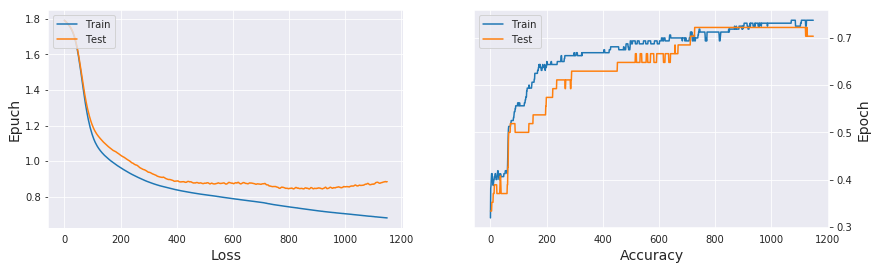

In [ ]:
f, axes = plt.subplots(1,2,figsize=(14,4))

axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_xlabel('Loss', fontsize=14)
axes[0].set_ylabel('Epuch', fontsize=14)
axes[0].yaxis.tick_left()
axes[0].legend(['Train', 'Test'], loc='upper left')

axes[1].plot(history.history['acc'])
axes[1].plot(history.history['val_acc'])
axes[1].set_xlabel('Accuracy', fontsize=14)
axes[1].set_ylabel('Epoch', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(['Train', 'Test'], loc='upper left')

plt.show()

In [ ]:
print("Training set: ", history.history.get('acc')[-1])
print("Test set: ", history.history.get('val_acc')[-1])

Training set:  0.7374999970197678
Test set:  0.7037037014961243


## <span id="13"></span> ** 5. Comparing the Results **

In [ ]:
models = [('Logistic Regression', accuracy_lr_train, accuracy_lr_test),
          ('KNN', accuracy_knn_train, accuracy_knn_test),
          ('SVM (Linear)', accuracy_svm_linear_train, accuracy_svm_linear_test),
          ('SVM (Kernel)', accuracy_svm_kernel_train, accuracy_svm_kernel_test),
          ('Naive Bayes', accuracy_nb_train, accuracy_nb_test),
          ('Decision Tree Classification', accuracy_dt_train, accuracy_dt_test),
          ('Random Forest Classification', accuracy_rf_train, accuracy_rf_test),
          ('ANN', history.history.get('acc')[-1], history.history.get('val_acc')[-1]),
         ]

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Logistic Regression,0.68125,0.666667
1,KNN,1.00000,0.740741
2,SVM (Linear),0.75000,0.703704
3,SVM (Kernel),0.81875,0.777778
4,Naive Bayes,0.31250,0.351852
5,Decision Tree Classification,0.90000,0.685185
6,Random Forest Classification,1.00000,0.796296
7,ANN,0.73750,0.703704


### <span id="14"></span> ** Visualizing Models Performance **

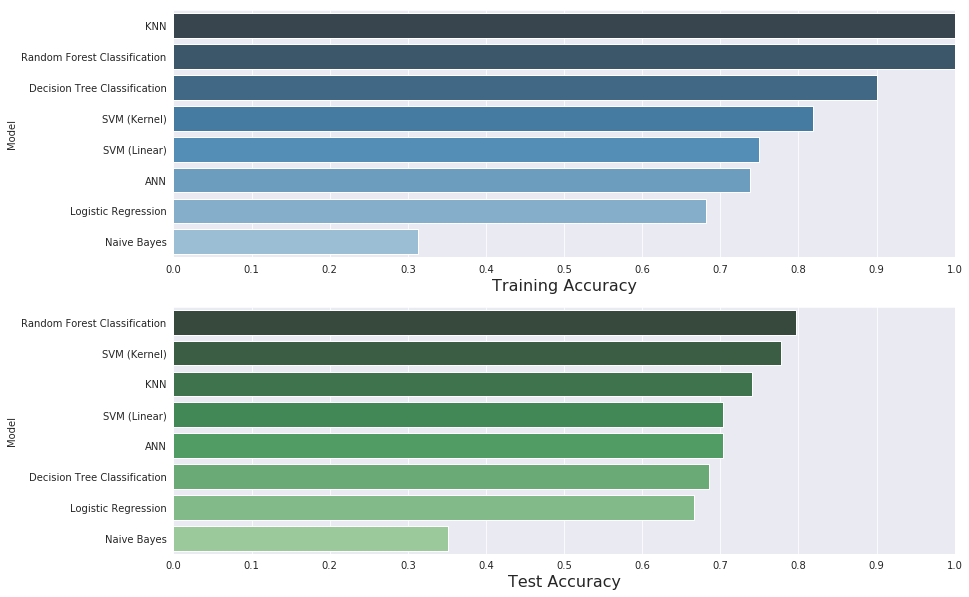

In [ ]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

## <span id="15"></span> ** 6. Conclusion **

In this kernel, I have built 8 classification models using Glass Identification Dataset. These are logistic, k-nn, svm(linear), svm(kernel), naive bayes, decision tree, random forest and artificial neural network. Then measured and visualized the performance of the models. Please make a comment and let me know how to improve model performance, visualization or something in this kernel. This will also help me on my future works.
 🙂👍